# Proyecto de Física - Simulación de un circuito RLC

En este cuaderno-jupyter podras hallar el código **python** usado para simular un circuito RLC.

### Integrantes
* Micael
* Alejandra Hinostroza
* Gustavo Lozano Acuña

## Simulación Circuito RLC

********** Bienvenido **********
Ingresa el intervalo [a, b] a analizar la señal.
Ingrese valor de a: 0
Ingrese valor de b: 500
Ingrese el tamaño del paso del retodo rk4: 0.01
Seleccione el pulso del voltaje
Elija una operación: 
a) sinusoidal.
b) cuadrada.
c) cierra.
>>> b
Amplitud de la onda cuadrada(vpp): 12.96
Frecuencia de la onda cuadrada(hz): 0.008
Procesando Datos ...
Elija una operación: 
a) Graficar corriente vs tiempo.
b) Graficar Voltaje vs tiempo.
c) Graficar carga vs tiempo.
d) Inicializar denuevo.
e) Exit.
>>> b
Elija una operación: 
a) Voltaje en inductores(FALTA IMPLEMENTAR).
b) Voltaje en condensadores.
c) Voltaje en resistencias.
d) Volver al menú de graficos.
>>> b


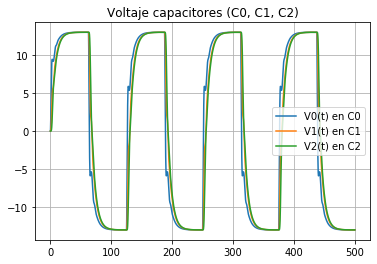

Elija una operación: 
a) Graficar corriente vs tiempo.
b) Graficar Voltaje vs tiempo.
c) Graficar carga vs tiempo.
d) Inicializar denuevo.
e) Exit.
>>> a
Elija una operación: 
a) Corriente en inductores.
b) Corriente en condensadores.
c) Corriente en resistencias.
d) Volver al menú de graficos.
>>> a


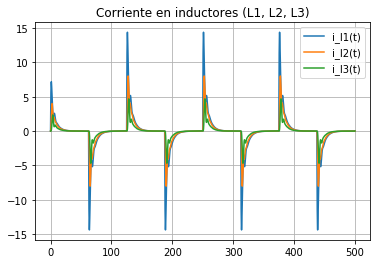

Elija una operación: 
a) Graficar corriente vs tiempo.
b) Graficar Voltaje vs tiempo.
c) Graficar carga vs tiempo.
d) Inicializar denuevo.
e) Exit.
>>> e


SystemExit: 1

In [3]:
"""
Solucion de un sistema de odes(generado por un circuito rlc)
"""
#import struct
import sys
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from scipy import signal as sg

############################################################
############    metodo numerico         ####################
############################################################
############    * runge kutta           ####################
############    * genera_funcion_sist   ####################
############################################################
############################################################



def runge_kutta_sist(x0, f, h, a, b):
    """
    Resuelve el sistema de ecuaciones diferenciales
    x' = f(t, x), x(t) = [x1(t), x2(t), ..., xm(t)], donde xr(t): R-> R^{p}, p natural
    input:
        x0: valor de inicio (manteniendo la estructura de x(t))
        f: funcion vectorial (camino)
        a, b: cota inferior y superior (resp) del intervalo [a, b]
        h: tamaño de paso
    output:
        x = [x0, ..., xk, ... xn]: xk= aproximacion de la solucion del sistema de odes tk = a + k*h.  
    """
    if isinstance(x0, np.ndarray):
        t = np.arange(a, b+h/2, h, dtype=np.longdouble)
        #x = np.array([x0])  # Solucion del sistema de odes
        rows, cols = np.shape(x0)
        x = np.zeros((len(t), rows, cols), dtype=np.longdouble)
        x[0] = x0
        tt = t[:len(t)-1]
        for k, tk in enumerate(tt):
            k1 = f(tk , x[k])
            aux2 = x[k]+h*k1/2 #variable de depuracion
            k2 = f(tk + h/2, x[k]+h*k1/2)
            aux3 = x[k]+h*k2/2 #variable de depuracion
            k3 = f(tk + h/2, x[k]+h*k2/2)
            aux4 = x[k]+h*k3   #variable de depuracion
            k4 = f(tk + h, x[k]+h*k3)
            xx = x[k] + h*(k1+2*k2+2*k3+k4)/6 # xx = x_{k+1}
            x[k+1] = xx

        return t, x
    else:
        t = np.arange(a, b, h)
        #x = np.array([x0])  # Solucion del sistema de odes
        #rows, cols = np.shape(x0)
        x = np.zeros(len(t), dtype=np.longdouble)
        x[0] = x0

        for k, tk in enumerate(t[:len(t)-1]):
            k1 = f(tk , x[k])
            aux2 = x[k]+h*k1/2
            k2 = f(tk + h/2, x[k]+h*k1/2)
            aux3 = x[k]+h*k2/2
            k3 = f(tk + h/2, x[k]+h*k2/2)
            aux4 = x[k]+h*k3
            k4 = f(tk + h, x[k]+h*k3)
            xx = x[k] + h*(k1+2*k2+2*k3+k4)/6 # xx = x_{k+1}
            x[k+1] = xx

        return t, x


""" Antigua implementacion(ERROR: indexacion en el tiempo(t))
def runge_kutta_sist(x0, f, h, a, b):
    
    #Resuelve el sistema de ecuaciones diferenciales
    #x' = f(t, x), x(t) = [x1(t), x2(t), ..., xm(t)], donde xr(t): R-> R^{p}, p natural
    #input:
    #    x0: valor de inicio (manteniendo la estructura de x(t))
    #    f: funcion vectorial (camino)
    #    a, b: cota inferior y superior (resp) del intervalo [a, b]
    #    h: tamaño de paso
    #output:
    #    x = [x0, ..., xk, ... xn]: xk= aproximacion de la solucion del sistema de odes tk = a + k*h.  
    

    t = np.arange(a, b, h)
    #x = np.array([x0])  # Solucion del sistema de odes
    x = np.ndarray((len(t), 2, 3), dtype=np.longdouble)
    x[0] = x0

    for k, tk in enumerate(t[:len(t)-1]):
        k1 = f(tk , x[k])
        #aux2 = x[k]+h*k1/2
        k2 = f(tk + h/2, x[k]+h*k1/2)
        #aux3 = x[k]+h*k2/2
        k3 = f(tk + h/2, x[k]+h*k2/2)
        #aux4 = x[k]+h*k3
        k4 = f(tk + h, x[k]+h*k3)
        xx = x[k] + h*(k1+2*k2+2*k3+k4)/6 # xx = x_{k+1}
        x[k+1] = xx

    return t, x
"""
def genera_funcion_sist(pulso, amp, frec, induc, resist, capacit):
    if pulso == "sinusoidal":
        pulso_volt = lambda t: amp*np.sin(2*pi*frec*t)

    elif pulso == "cuadrada":
        pulso_volt = lambda t: amp*sg.square(2*np.pi*frec*t)

    elif pulso == "cierra":
        pulso_volt = lambda t: amp*sg.sawtooth(2*np.pi*frec*t)
    
    def f(t, x, L = induc, C = capacit, R = resist, volt = pulso_volt):
        z = x[0]
        q = x[1]

        # definiendo g(t, z, q) = [g1, g2, g3]

        V = lambda t: volt(t) # Voltaje variable

        #NOTA: qk = q[k-1]


        g1 = lambda t, z, q: V(t)/L[0] - ((L[0]+L[1])/(C[0]*L[0]*L[1]))*q[0] + 1/(L[1]*C[1])*q[1] - (R[0]/L[0])*z[0] - (L[1]/R[1]-L[0]/R[0])*(z[1]+z[2])
        g2 = lambda t, z, q: q[0]/(L[1]*C[0]) - (L[1]+L[2])/(C[1]*L[1]*L[2])*q[1] + q[2]/(C[2]*L[2]) - (R[1]/L[1])*(z[1]+z[2])
        g3 = lambda t, z, q: q[1]/(L[2]*C[1]) - q[2]/(C[2]*L[2]) - (R[2]/L[2])*z[2] 

        g = lambda t, z, q: np.array([g1(t, z, q), g2(t, z, q), g3(t, z, q)])

        f1 = lambda t, z, q: g(t, z, q)
        f2 = lambda t, z, q: z

        F = lambda t, z, q: np.array([f1(t, z, q), f2(t, z, q)], dtype=np.longdouble)

        return F(t, z, q)
    
    return f



####################################################################
############    Graficos                        ####################
####################################################################
############    * plot_current_inductor         ####################
############    * plot_current_condesador       ####################
############    * plot_current_resist           ####################
############                                    ####################
############    * plot_volt_inductor            ####################
############    * plot_volt_condesador          ####################
############    * plot_volt_resist              ####################
############                                    ####################
############    * plot_charge_condensador       ####################
####################################################################
####################################################################
    

def plot_current_inductor(t, i):

    i0 = np.array([ik[0] for ik in i])
    i1 = np.array([ik[1] for ik in i])
    i2 = np.array([ik[2] for ik in i])

    i_l1 = i0 + i1+ i2
    i_l2 = i1 +i2
    i_l3 = i2

    plt.plot(t, i_l1, label = "i_l1(t)")
    plt.plot(t, i_l2, label = "i_l2(t)")
    plt.plot(t, i_l3, label = "i_l3(t)")

    plt.title("Corriente en inductores (L1, L2, L3)")
    plt.grid()
    plt.legend()
    plt.show()

def plot_current_condesador(t, i):
    i0 = np.array([ik[0] for ik in i])
    i1 = np.array([ik[1] for ik in i])
    i2 = np.array([ik[2] for ik in i])

    plt.plot(t, i0, label = "i_C1(t)")
    plt.plot(t, i1, label = "i_C2(t)")
    plt.plot(t, i2, label = "i_C3(t)")

    plt.title("Corriente en los capacitores (C1, C2, C3)")
    plt.grid()
    plt.legend()
    plt.show()


def plot_current_resist(t, i):
    i0 = np.array([ik[0] for ik in i])
    i1 = np.array([ik[1] for ik in i])
    i2 = np.array([ik[2] for ik in i])

    i_r1 = i0 + i1+ i2
    i_r2 = i1 +i2
    i_r3 = i2

    plt.plot(t, i_r1, label = "i_r1(t)")
    plt.plot(t, i_r2, label = "i_r2(t)")
    plt.plot(t, i_r3, label = "i_r3(t)")

    plt.title("Corriente en las resistencias (R1, R2, R3)")
    plt.grid()
    plt.legend()
    plt.show()

# Como calcular derivadas con data discreta
def plot_volt_inductor(t, i):
    pass

def plot_volt_condesador(t, q, C):
    q0 = np.array([qk[0] for qk in q])
    q1 = np.array([qk[1] for qk in q])
    q2 = np.array([qk[2] for qk in q])
    
    v0 = q0/C[0]
    v1 = q1/C[1]
    v2 = q2/C[2]


    plt.plot(t, v0, label="V0(t) en C0")
    plt.plot(t, v1, label="V1(t) en C1")
    plt.plot(t, v2, label="V2(t) en C2")
    plt.title("Voltaje capacitores (C0, C1, C2)")
    plt.legend()
    plt.grid()
    plt.show()


def plot_volt_resist(t, i, R):
    i0 = np.array([ik[0] for ik in i])
    i1 = np.array([ik[1] for ik in i])
    i2 = np.array([ik[2] for ik in i])

    i_r1 = i0 + i1+ i2
    i_r2 = i1 +i2
    i_r3 = i2

    v0 = i_r1*R[0]
    v1 = i_r2*R[1]
    v2 = i_r3*R[2]


    plt.plot(t, v0, label="V0(t)")
    plt.plot(t, v1, label="V1(t)")
    plt.plot(t, v2, label="V2(t)")
    plt.title("Voltaje Resistencias (R0, R1, R2)")
    plt.legend()
    plt.grid()
    plt.show()


def plot_charge_condensador(t, q):
    q0 = np.array([qk[0] for qk in q])
    q1 = np.array([qk[1] for qk in q])
    q2 = np.array([qk[2] for qk in q])
    
    plt.plot(t, q0, label="q0(t)")
    plt.plot(t, q1, label="q1(t)")
    plt.plot(t, q2, label="q2(t)")
    plt.title("RLC charge")
    plt.legend()
    plt.grid()
    plt.show()

    


####################################################################
############    Menus                           ####################
####################################################################
############    * menu_init                     ####################
############    * abecedario                    ####################
############    * options_menu_operation        ####################
############    * options_menu_graph            ####################
############    * menu_operation                ####################
####################################################################
####################################################################


def menu_init():
    print("********** Bienvenido **********")
    print("Ingresa el intervalo [a, b] a analizar la señal.")

    # [a, b] es el intervalo de tiempo en el cual se estara analizando el circuito
    a = float(input("Ingrese valor de a: "))   # Inicializar valor real
    b = float(input("Ingrese valor de b: "))   # Inicializar valor real

    while b < a:
        b = float(input("Ingrese valor de b (b > {}): ".format(a)))
        
        
    h = float(input("Ingrese el tamaño del paso del retodo rk4: "))    # tamaño de paso en el metodo de runge-kutta

    while h <= 0 or h > abs(b-a):
        if h < 0:
            h = float(input("Tamaño del paso negativo!.Intente denuevo (paso positivo): "))
        elif np.isclose(h, 0.0):
            h = float(input("Paso nulo. Ingrese un paso mayor que 0.0: "))
        else:
            h = float(input("Tamaño del paso muy grande.Intente denuevo (paso < {}): ".format(abs(b-a))))
        
    print("Seleccione el pulso del voltaje")
    options_pulso = ["sinusoidal", "cuadrada", "cierra"]
    pulso , lether_option_pulso = options_menu(options_pulso)
    

    
    if pulso == lether_option_pulso[0]:
        pulso = "sinusoidal"
        amp = float(input("Amplitud de la onda {}(vpp): ".format(pulso)))
        frec = float(input("Frecuencia de la onda {}(hz): ".format(pulso)))
    elif pulso == lether_option_pulso[1]:
        pulso = "cuadrada"
        amp = float(input("Amplitud de la onda {}(vpp): ".format(pulso)))
        frec = float(input("Frecuencia de la onda {}(hz): ".format(pulso)))
    elif pulso == lether_option_pulso[2]:
        pulso = "cierra"
        amp = float(input("Amplitud de la onda {}(vpp): ".format(pulso)))
        frec = float(input("Frecuencia de la onda {}(hz): ".format(pulso)))
    #elif pulso == lether_option_pulso[-1]:
    #    sys.exit(1)
    """
    else:
        amp = float(input("Amplitud de la onda {}: ".format(pulso)))
        frec = float(input("Frecuencia de la onda {}: ".format(pulso)))
    """
    return a, b, h, pulso, amp, frec

def abecedario(n):  # genera las n primero letras del abecedario
    if n < 27:
        return [chr(x) for x in range(97, 97+n)]
    else:
        n = 26
        #print("n = {}".format(n))
        return abecedario(n)



def options_menu(options):
    print("Elija una operación: ")
    lether_option = abecedario(len(options))
    for lether, opt in zip(lether_option, options):
        print("{}) {}.".format(lether, opt))
    option = input(">>> ")
    option.lower()

    while option not in lether_option:
        option = input("Opción invalida. Intenta denuevo(opcion valida = {}).\n>>> ".format(lether_option))
        option.lower()

    return option, lether_option


def menu_operation(t, i, q, L , R, C):
    options_graph = ["Graficar corriente vs tiempo", "Graficar Voltaje vs tiempo", "Graficar carga vs tiempo", "Inicializar denuevo","Exit"]
    graph , lether_option_graph = options_menu(options_graph)


    if graph == lether_option_graph[0]: # Graficas de corriente
        options_current = ["Corriente en inductores", "Corriente en condensadores" , \
                        "Corriente en resistencias", "Volver al menú de graficos"] 
        current, lether_option_current = options_menu(options_current)
        
        if current == lether_option_current[0]: 
            plot_current_inductor(t, i)
            menu_operation(t, i, q, L , R, C)

        elif current == lether_option_current[1]:
            plot_current_condesador(t, i)
            menu_operation(t, i, q, L , R, C)

        elif current == lether_option_current[2]:
            plot_current_resist(t, i)
            menu_operation(t, i, q, L , R, C)

        elif current == lether_option_current[-1]:
            menu_operation(t, i, q, L , R, C)

    elif graph == lether_option_graph[1]: # Graficas de voltaje
        options_volt = ["Voltaje en inductores(FALTA IMPLEMENTAR)", "Voltaje en condensadores" , \
                        "Voltaje en resistencias", "Volver al menú de graficos"] 
        volt, lether_option_volt = options_menu(options_volt)
        
        if volt == lether_option_volt[0]:
            plot_volt_inductor(t, i)
            menu_operation(t, i, q, L , R, C)

        elif volt == lether_option_volt[1]:
            plot_volt_condesador(t, q, C)
            menu_operation(t, i, q, L , R, C)
            
        elif volt == lether_option_volt[2]:
            plot_volt_resist(t, i, R)
            menu_operation(t, i, q, L , R, C)

        elif volt == lether_option_volt[-1]:
            menu_operation(t, i, q, L , R, C)



    elif graph == lether_option_graph[2]:   # Graficas de cargas
        options_charge = ["Carga en condensadores", "Volver al menú de graficos"] 
        
        charge, lether_option_charge = options_menu(options_charge)
        
        if charge == lether_option_charge[0]:
            plot_charge_condensador(t, q)
            menu_operation(t, i, q, L , R, C)

        elif charge == lether_option_charge[-1]:
            menu_operation(t, i, q, L , R, C)

    elif graph == lether_option_graph[3]:   # Volver a menu inicial
        simulacion_rlc()

    elif graph == lether_option_graph[-1]:  # terminar programa
        sys.exit(1)
        




##################################################################################################################
#################################### SIMULACION ##################################################################
##################################################################################################################

def inicializacion():
    #NOTA: x0 = [z0, q0] = [q'(0), q(0)] = [i(0), q(0)], donde i = (i1, i2, i3) y q = (q1, q2, q3)
    x0 = np.array([[0, 0, 0], [0, 0, 0]], dtype=np.longdouble)
    """
    L0 = 18.31e-3    # Asignar valor real del inductancia
    L1 = 11.27e-3    # Asignar valor real del inductancia
    L2 = 17.51e-3    # Asignar valor real del inductancia

    C0 = 218e-6    # Asignar valor real de la capacitancia
    C1 = 481e-6    # Asignar valor real de la capacitancia
    C2 = 997e-6    # Asignar valor real de la capacitancia


    R0 = 4.355e3    # Asignar valor real de la resistencia
    R1 = 3.334e3    # Asignar valor real de la resistencia
    R2 = 5.269e3    # Asignar valor real de la resistencia
    """

    L0 = 1.0    # Asignar valor real del inductancia
    L1 = 1.0    # Asignar valor real del inductancia
    L2 = 1.0    # Asignar valor real del inductancia

    C0 = 1.0    # Asignar valor real de la capacitancia
    C1 = 1.0    # Asignar valor real de la capacitancia
    C2 = 1.0    # Asignar valor real de la capacitancia


    R0 = 1.0    # Asignar valor real de la resistencia
    R1 = 1.0    # Asignar valor real de la resistencia
    R2 = 1.0    # Asignar valor real de la resistencia

    L = np.array([L0, L1, L2], dtype=np.longdouble)
    C = np.array([C0, C1, C2], dtype=np.longdouble)
    R = np.array([R0, R1, R2], dtype=np.longdouble)


    a, b, h, pulso, amp, frec = menu_init()

    f = genera_funcion_sist(pulso, amp, frec, L, R, C)    
        
    # resolviendo el sistema de odes mediante rk4, x = [i, q]
    print("Procesando Datos ...")
    t, x = runge_kutta_sist(x0, f, h, a, b)

    i = np.array([xk[0] for xk in x])   # i = (i0, i1, i2)
    q = np.array([xk[1] for xk in x])   # q = (q0, q1, q2)

    return t, i, q, L, R, C



def simulacion_rlc():
    t, i, q, L, R, C = inicializacion()
    menu_operation(t, i, q, L, R, C)



simulacion_rlc()